<h2><b>Introduction</b></h2>
<p>In this project, we'll analyse data scraped from <a href="https://drugs.com/">drugs.com</a>
which contains the reviews/comments made by people who use Xanax drug for treating their health
conditions. The data contains comments/reviews made by Xanax users from February 27, 2008 to February 1, 2020. This data analysis project is done in a jupyter notebook which allows us to use python programming language for the task. Below are the tools or libraries built in python for data analysis that we will use for our project:</p>
<br>
<ul>
    <li>Pandas - built on Numpy for data frame manipulation</li>
    <li>Numpy - for array construction and manipulation</li>
    <li>Matplotlib - for data visualization</li>
    <li>Seaborn - built to support matplotlib for data visualization</li>
    <li>TextBlob - for text processing</li>
</ul>
<br>
<h5><b>To begin with, we first import our libraries we will need for our analysis</b></h5>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from stopwords import final_stopwords
from textblob import TextBlob,Word
import warnings
warnings.filterwarnings(action='ignore')
from IPython.display import display

<h5><strong>loading the data</strong></h5>

In [2]:
file = r'E:\documents\Statistics\Programming\Python Programming\Data science\Must learn Data Science\projects\Xanas reviews\Xanas_drug_reviews.csv'
data = pd.read_csv(file)
data.head()

,date,condition,review,rating
0,"February 1, 2020",Anxiety,I've taken xanax to help me sleep for several ...,9.0
1,"January 22, 2020",Anxiety,"I have been on Xanax for about 20 years, 1mg f...",10.0
2,"January 19, 2020",Anxiety,I have been using this drug for several years ...,10.0
3,"January 14, 2020",Anxiety,I have been taking xanax for 10 years. Throug...,10.0
4,"January 12, 2020",Depression,I’m sorry my Dr ever put me on Xanax. It’s a ...,1.0


<h2><b>Data Understanding</b></h2>
<p>Before we start analyzing our data, we need to know everything about the data. This will allow us to have <em>full control</em> of the data and make our analysis much easier and precise. <q>By understanding our data</q>, we need to know the structure of the data, the number of rows and columns we have, what do the columns stand for, etc. Understanding the structure of your data is a crucial first step in preprocessing and analyzing any dataset. The way a data is laid out is just as important as the actual values, because the structure determines how the data can be manipulated and interpreted.</p>

<br>

<h4><b>features and descriptions</b></h4>
<ul>
    <li>date - The data the user posted the comment</li>
    <li>condition - The condition the drug was used to treat</li>
    <li>review - The comment/review made by the user</li>
    <li>rating - How effective the user thinks the drug was (on a scale of 10)</li>
</ul>

<br>

<h5><b>check the number of rows and the data types of the columns</b></h5>

In [3]:
# number of rows and columns
print('The number of rows in the data is: {}\n'.format(data.shape[0]))
print('Column names and their data types:\n')
data.info()

The number of rows in the data is: 798

Column names and their data types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 4 columns):
date         798 non-null object
condition    789 non-null object
review       798 non-null object
rating       741 non-null float64
dtypes: float64(1), object(3)
memory usage: 25.0+ KB


<h5><b>check for missing values and duplicated rows</b></h5>

In [4]:
print('Number of duplicated rows: {}\n'.format(data.duplicated().sum()))
print('Number of missing values:')
data.isnull().sum()

Number of duplicated rows: 1

Number of missing values:


date          0
condition     9
review        0
rating       57
dtype: int64

<h5><b>check the number of rows that have both condition and rating missing</b></h5>

In [5]:
wanted_rows = data[(data.rating.isnull())&(data.condition.isnull())]
wanted_rows

,date,condition,review,rating
134,"March 19, 2018",NaN,I know these meds are very addictive but right...,NaN
589,"August 31, 2011",NaN,"I could not get on a plane, in elevators, room...",NaN


<h5><b>what are the types of conditions treated with Xanax</b></h5>

In [6]:
condition_data = data.dropna()
condn = condition_data.condition.unique().tolist()
print('The types of conditions treated with Xanax:\n')
for i,j in enumerate(condn):
    print('{}. {}'.format(i+1,j))

The types of conditions treated with Xanax:

1. Anxiety
2. Depression
3. Panic Disorder
4. Tinnitus
5. Dysautonomia


<h2><b>Data Cleaning</b></h2>
<p>This is another important and crucial stage of our data mining process. From the process we went through earlier, we can see that our data is not clean enough for our analysis. The data contains duplicated rows and missing values, and even the <b>date</b> column doesn't have the right data type. Aside getting rid of the duplicated rows and dealing with the missing values, we still have to process the <b>review</b> column which contains the text data.Text may contain numbers, special characters, and unwanted spaces. We will remove all the special characters, numbers, and unwanted spaces from our text. The final preprocessing step will be the lemmatization. In lemmatization, we reduce the word into dictionary root form. For instance 'cats' is converted into 'cat'. Lemmatization is done in order to avoid creating features that are semantically similar but syntactically different.
</p>

In [7]:
# change the date column from object to datetime data type
data.date = pd.to_datetime(data.date)

# fill in missing values in the rating column with the mean rating score
data.rating.fillna(value=data.rating.mean(),inplace=True)
# replace the missing condition values with the most appearing condition
data.condition.fillna(value=data.condition.mode().values[0],inplace=True)

# change the condition column to a column of categories
data.condition = data.condition.astype('category')

# drop the duplicated rows
data.drop_duplicates(inplace=True)

# reset the index
data.reset_index(inplace=True)
data = data.drop('index',axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 4 columns):
date         797 non-null datetime64[ns]
condition    797 non-null category
review       797 non-null object
rating       797 non-null float64
dtypes: category(1), datetime64[ns](1), float64(1), object(1)
memory usage: 19.7+ KB


<h5><b>Text preprocessing</b></h5>
<p><b>removing numbers, stopwords, special characters, and word lemmatization</b></p>

In [8]:
# remove all stopwords and punctuation marks
stp_wrds = final_stopwords

# loop through all the text messages in the data and remove all stopwords
for i in range(len(data)):
    # get the text
    text = data.review[i]
    # create a textblob object
    blob = TextBlob(text)
    # convert the text into a list of words
    words = blob.words
    # loop through all the words and identify the stopwords and remove them
    for word in words:
        wrd = word.strip()
        if wrd in stp_wrds:
            words.remove(word)
        else:
            continue
    line = ' '.join(words)
    data.review[i] = line

In [9]:
numbers_spechar = ['0','1','2','3','4','5','6','7','8','9','I','\'']

# remove all the numbers from the text
for i in range(len(data)):
    # get the text message
    txt_msg = data.review[i]
    # split the text into a list of single characters
    char_list = txt_msg.split()
    # loop through the list and get rid of the numbers
    for num in numbers_spechar:
        for wrd in char_list:
            if num in wrd:
                char_list.remove(wrd)
            else:
                continue
    new_text = ' '.join(char_list)
    data.review[i] = new_text

In [10]:
# we now lemmatize all the words
for i in range(len(data)):
    # get the text message
    txt = data.review[i]
    # create a textblob object
    blb = TextBlob(txt)
    # convert the text into a list of words
    wrds = blb.words
    wrd_container = []
    # iterate over the words and lemmatize each one of them
    for wrd in wrds:
        new_wrd = Word(wrd)
        lem_word = new_wrd.lemmatize()
        wrd_container.append(lem_word)
    # join the lemmatized words
    wrd_line = ' '.join(wrd_container)
    data.review[i] = wrd_line
    
data.head()

,date,condition,review,rating
0,2020-02-01,Anxiety,xanax help sleep several year little possible ...,9.0
1,2020-01-22,Anxiety,been Xanax about year sleep addicted it depend...,10.0
2,2020-01-19,Anxiety,been this drug several year anxiety attack gre...,10.0
3,2020-01-14,Anxiety,been taking xanax year Through alcohol addicti...,10.0
4,2020-01-12,Depression,’ m Dr put Xanax ’ a drug dr put on more a wee...,1.0


<h2><b>Exploratory Data Analysis</b></h2>
<p>At this point, the task is to dissect the data and gain insights from it. <abbr title="Exploratory Data Analysis">EDA</abbr> is simply describing the data by means of visualization. It involves asking questions about the data and answering them with the help of charts/graphs (graphical representation of the data). We will try to analyze the data to find out how Xanax is being used and how effective it has been on the part of the users. In view of this, we will dig into the data and try to answer some questions about the use and user ratings of Xanax. Before we start asking our questions, we must establish the fact that each review/comment made by a user means the drug was used by the user, and each rating specifies how effective the drug was to the user. To make things simple and intuitive, below is a table that shows the question being asked about the data, and the method used to answer it.
</p>
<br>
<br>
<table>
    <thead>
        <tr>
            <th>No.</th>
            <th>Question</th>
            <th>Method for answering</th>
            <th>Visualization type</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>1</td>
            <td>What condition do most people treat Xanax with?</td>
            <td>Finding the percentage distribution of the conditions treated with Xanax in the
                data and visualize it.
            </td>
            <td>Pie chart</td>
        </tr>
        <tr>
            <td>2</td>
            <td>What is the trend of the use of Xanax over the years ?</td>
            <td>Count the number of reviews/comments made by users in our data in each year
                and graph the pattern (a review/comment made by a user means the drug has
                been used by the user.)</td>
            <td>Line plot</td>
        </tr>
        <tr>
            <td>3</td>
            <td>What is the trend of the use of Xanax over the years for the treatment
                of a specific condition ?</td>
            <td>Count the number of conditions reported for treatment with Xanax in each year
                and graph the pattern.</td>
            <td>Line plot</td>
        </tr>
        <tr>
            <td>4</td>
            <td>What condition was Xanax very effective for treating based on the user rating</td>
            <td>Finding the average user rating accross all years for each condition. This
                can be done by grouping the data by the types of condition and finding the
                overall average.</td>
            <td>Bar charts</td>
        </tr>
        <tr>
            <td>5</td>
            <td>How effective has Xanax been for the treatment of all the types of conditions
                over the years.</td>
            <td>Finding the averages of the user ratings acrosss all years and visualizing it
                to see the trend.</td>
            <td>Line plot</td>
        </tr>
        <tr>
            <td>6</td>
            <td>What kind of words do the users commonly use in describing the effectiveness
                of the drug for treating their conditions ?</td>
            <td>We take each snippet of text, count the occurrences of each word within it, and put
                the results in a table and graph the data.</td>
            <td>Bar chart</td>
        </tr>
    </tbody>
</table>
<br>
<p>We now have our questions and even know how we are going to answer them. Without wasting much time, let's just dive into our data and start finding, and interpreting some results.</p>
<br>
<br>
<h5><b>What condition do most people treat Xanax with ?</b></h5>

Anxiety                    508
Panic Disorder             207
Depression                  74
Tinnitus & Dysautonomia      8
Name: condition, dtype: int64

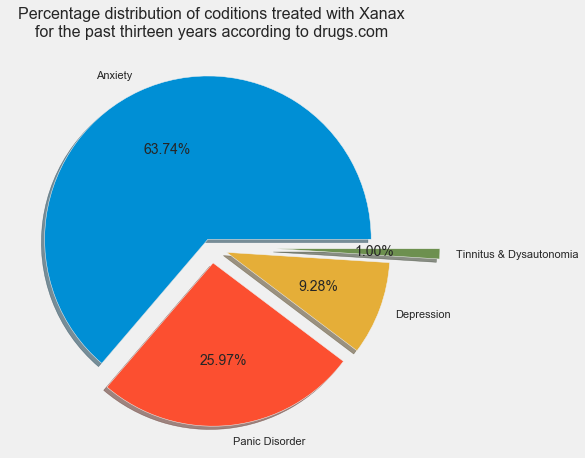

In [13]:
# count the number of times each condition was reported
conditions_df = data.condition.value_counts()[:3]
conditions_df['Tinnitus & Dysautonomia'] = 8
# display the results
display(conditions_df)

num_ = conditions_df.values
labels = conditions_df.index

# plot the percentage distribution
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(12,7))
    plt.pie(num_,labels=labels,autopct='%.2f%%',radius=1.0,shadow=True,
           explode=[0.05,0.1,0.1,0.4])
    plt.title('Percentage distribution of coditions treated with Xanax\nfor the past thirteen years according to drugs.com',
             fontsize=16)
    plt.show()

<p>As depicted above by the table and the chart, we can see that <b>Anxiety</b> is the common
    condition treated with Xanax. 63.74% of the 798 users used the drug to treat anxiety.
    As stated in a review of <i>Conor Sheehy</i> about the uses and effects of Xanax at <a href="https://www.therecoveryvillage.com/xanax-addiction/xanax-uses/#gref" target="_blank">https://www.therecoveryvillage.com</a>,<q>The most common use for Xanax is the
    management of anxiety disorders</q> and we can clearly see from our data analysis that his
    claim is valid. The next condition that had people resulting to the use of Xanax is <b>Panic
    Disorder</b>, as we can see from the above figures that 25.97% of the 798 users used it for
    treating the condition.
</p>
<p>We can also see that the use of Xanax for treating <b>Tinnitus & Dysautonomia</b> is very
    low as 1% of the 798 users used it for treating the condition. This might be caused by the
    following two reasons:
    <ul>
        <li>people prefer other drugs to Xanax for the treatment of Tinnitus & Dysautonomia</li>
        <li>or people rarely suffer from Tinnitus & Dysautonomia so they don't need the
            medication</li>
    </ul>
</p>
<br>
<br>
<h5><b>What is the trend of the use of Xanax over the years ?</b></h5>

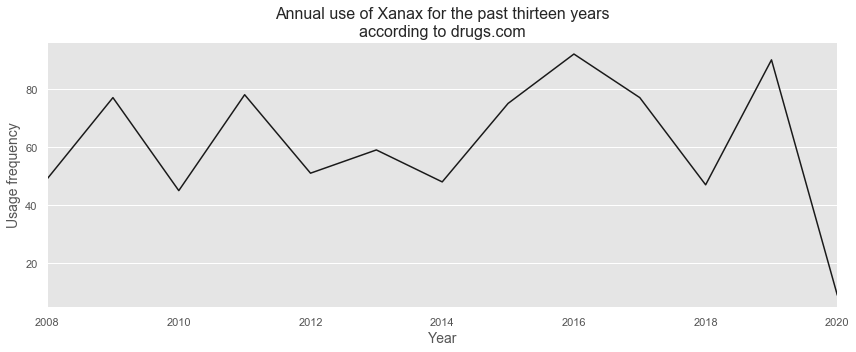

In [14]:
# change the data from datetime to period of month and count the number of user reviews
data.date = pd.to_datetime(data.date)
data = data.set_index('date')
data.index = data.index.to_period('y')
use_trend = data.index.value_counts().sort_index(ascending=True)

# plot the trend of the data
with plt.style.context('ggplot'):
    use_trend.plot(figsize=(12,5),style='k-')
    plt.title('Annual use of Xanax for the past thirteen years\naccording to drugs.com',fontsize=16)
    plt.xlabel('Year',fontsize=14)
    plt.ylabel('Usage frequency',fontsize=14)
    plt.tight_layout()
    plt.grid(axis='x')
    plt.show()

<p>Looking at the above chart, we can conclude that the use of Xanax has been fluctuating
    over the years. The number of people who will use Xanax can increase or decrease in any
    year. We can see that there is no seasonality in the use of the drug and the use cases
    can increase/decrease in a given year, and decrease/increase in the next year.</p>
<br>
<br>
<h5><b>What is the trend of the use of Xanax over the years for the treatment of a specific condition ?</b></h5>

In [15]:
# group the data by year and the type of the condition and find the sum
data = data.reset_index()
condition_trend = data[['date','condition']].groupby(['date','condition']).agg({'condition':'count'})
condition_trend = condition_trend.unstack(level='condition')
condition_trend.columns = ['Anxiety','Depression','Dysautonomia','Panic Disorder','Tinnitus']
display(condition_trend)

,Anxiety,Depression,Dysautonomia,Panic Disorder,Tinnitus
date,,,,,
2008,25.0,7.0,NaN,17.0,NaN
2009,45.0,8.0,NaN,23.0,1.0
2010,31.0,4.0,NaN,8.0,2.0
2011,54.0,9.0,NaN,14.0,1.0
2012,33.0,6.0,1.0,10.0,1.0
2013,34.0,6.0,NaN,18.0,1.0
2014,33.0,3.0,NaN,11.0,1.0
2015,43.0,8.0,NaN,24.0,NaN
2016,57.0,12.0,NaN,23.0,NaN


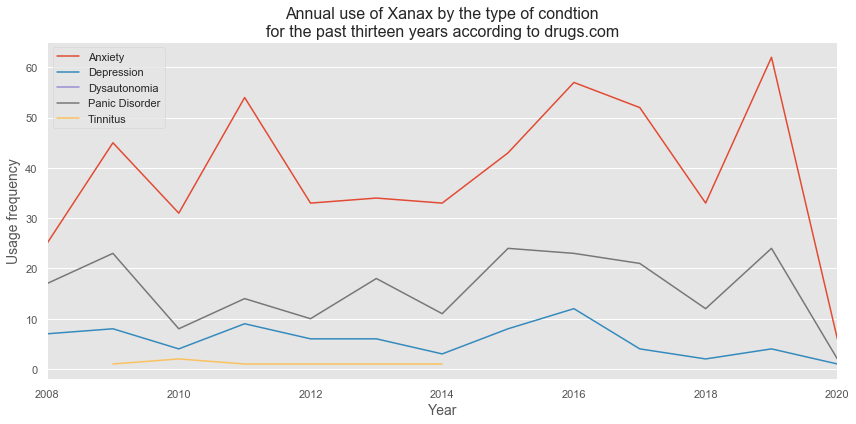

In [16]:
# plot the data to see the trends
with plt.style.context('ggplot'):
    condition_trend.plot(figsize=(12,6))
    plt.title('Annual use of Xanax by the type of condtion\nfor the past thirteen years according to drugs.com',fontsize=16)
    plt.xlabel('Year',fontsize=14)
    plt.ylabel('Usage frequency',fontsize=14)
    plt.tight_layout()
    plt.legend()
    plt.grid(axis='x')
    plt.show()

<p> As seen earlier that the general use of Xanax has been fluctuating over the years, it also
    turns out that the number of people, grouped by their conditions, who use Xanax can increase or
    decrease in any year. Again, there is no seasonality in the use of the drug and the use cases
    for treating all the types of conditions can increase/decrease in a given year, and
    decrease/increase in the next year.</p>
<br>
<br>
<h5><b>What condition was Xanax very effective for treating based on the user rating ?</b></h5>

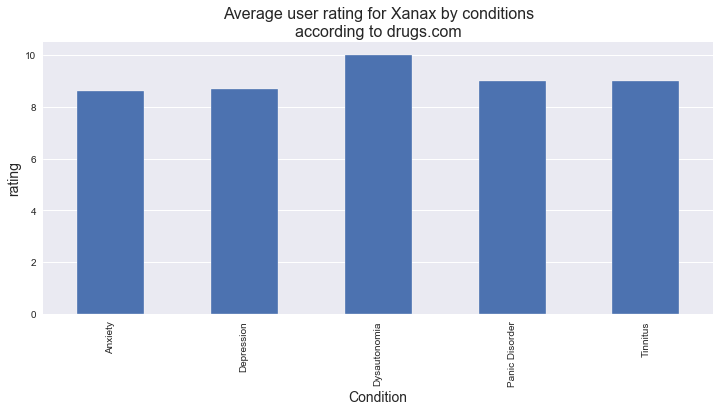

In [17]:
# calculate the average user rating for Xanax for treating a specific condtions
condition_rating = data[['condition','rating']].groupby('condition').mean()
condition_rating = np.round(condition_rating,1)

# plot the data
with plt.style.context('seaborn'):
    condition_rating.plot(kind='bar',figsize=(12,5),legend=False)
    plt.title('Average user rating for Xanax by conditions\naccording to drugs.com',fontsize=16)
    plt.xlabel('Condition',fontsize=14)
    plt.ylabel('rating',fontsize=14)
    plt.grid(axis='x')
    plt.show()

<h5><b>How effective has Xanax been for the treatment of all the types of conditions over the years ?</b></h5>

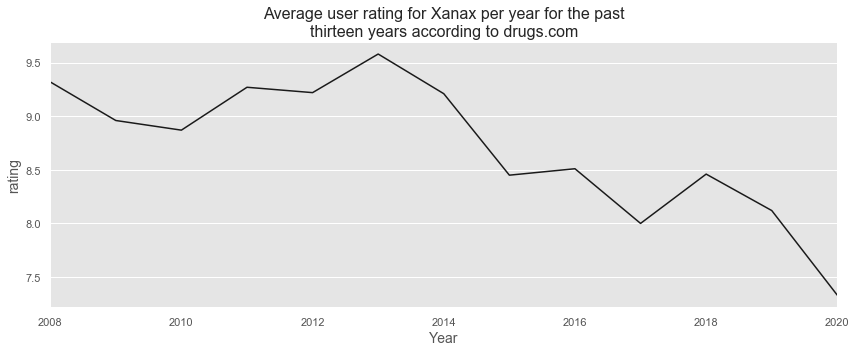

In [18]:
# calculate the average user ratings for all years
annual_rating = data[['date','rating']].groupby('date').mean()
annual_rating = np.round(annual_rating,2)

# plot the data
with plt.style.context('ggplot'):
    annual_rating.plot(figsize=(12,5),style='k-',legend=False)
    plt.title('Average user rating for Xanax per year for the past\nthirteen years according to drugs.com',
             fontsize=16)
    plt.xlabel('Year',fontsize=14)
    plt.ylabel('rating',fontsize=14)
    plt.tight_layout()
    plt.grid(axis='x')
    plt.show()

<p>Looking at the above chart, we can conclude that user's rating for the drug has been decreasing 
    since the year 2014. In wondering what might be the cause of this, we can't straight away
    conclude that the effectiveness of the Xanax has been diminishing as according to a report
    from <a href="https://www.imshealth.com/deployedfiles/imshealth/Global/Content/Corporate/Press%20Room/2012_U.S/Top_25_Medicines_Dispensed_Prescriptions_U.S..pdf" target="_blank">IMS Health</a>, <q>Xanax
    (alprazolam) consistently ranks as one of the most frequently dispensed psychotropic drugs in
    the United States</q>. We can only make this conclusion regarding our data from drugs.com and
    not make any inference on the population (all users of Xanax in the world).
    </p>
<br>
<br>
<h5><b>What kind of words do the users commonly use in their comments/reviews on Xanax for treating their conditions ?</b></h5>

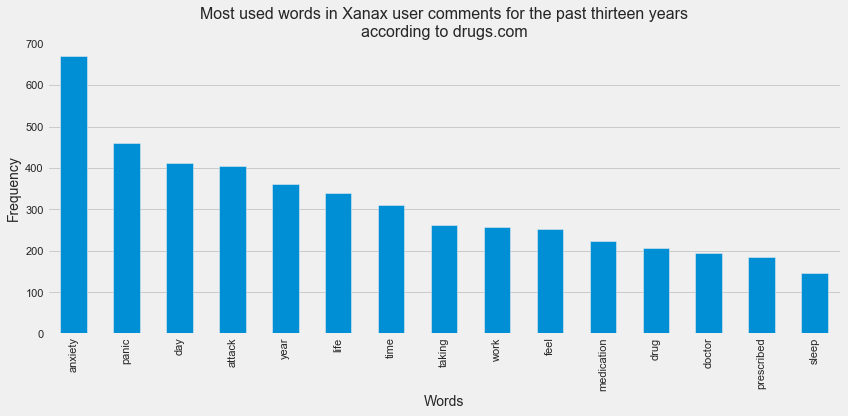

In [19]:
# count the number of times a word appears in each comment
word_count = {}
for i in data.review.values:
    text = TextBlob(str(i))
    word_list = text.words
    for wrd in word_list:
        if wrd in final_stopwords or wrd=="’":
            continue
        else:
            word_count.setdefault(wrd,0)
            word_count[wrd] += 1
        
# create the data frame
count_data = pd.Series(word_count)
count_data = count_data.sort_values(ascending=False)
count_data = count_data.drop(['Xanax','mg','This','My','thing'],axis=0)
count_data = count_data.head(15)

# plot the data
with plt.style.context('fivethirtyeight'):
    count_data.plot(figsize=(12,6),kind='bar',legend=False)
    plt.title('Most used words in Xanax user comments for the past thirteen years\naccording to drugs.com',
             fontsize=16)
    plt.ylabel('Frequency',fontsize=14)
    plt.xlabel('Words',fontsize=14)
    plt.tight_layout()
    plt.grid(axis='x')
    plt.show()

<p>We can see from the above chart that the word mostly found in the user comments/reviews
    is <i>anxiety</i> followed by <i>panic</i>. This actually makes complete sense as we earlier
    discovered that the conditions people mostly treat with Xanax is Anxiety followed by Panic
    Disorder. Other words, as seen from the graph, that was mostly used by users in their reviews
    are <i>day</i> which we can say that the drug was used on daily basis by the users,
    <i>prescribed and doctor</i> which we can say that the drug was used under a doctor's
    prescription.
</p>
<br>
<p>And this brings us to the end of the analysis.</p>
<br>
<br>
<h4><b>Project completed by: Prince Owusu</b></h4>
<p><a href="mailto:powusu381@gmail.com" target="_blank">Email</a> || <a href="https://www.linkedin.com/in/prince-owusu-356914198?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_contact_details%3B2NYoXqMHQKOMp0yWSME5mQ%3D%3D" target="_blank">LinkedIn</a> || <a href="https://twitter.com/iam_kwekhu" target="_blank">Twitter</a></p>